# Simple Linear Regression
## Aditya Bagad

### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Load the dataset

In [2]:
dataFrame = pd.read_csv('Weight_Height.csv')

In [3]:
dataFrame.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
dataFrame.shape

(999, 3)

In [5]:
dataFrame.describe()

,Height,Weight
count,999.000000,999.000000
mean,68.961051,186.984620
std,2.828938,19.575325
min,60.679817,123.528143
25%,67.110359,172.817035
50%,68.982381,187.291392
75%,70.919198,200.485744
max,78.095867,255.690835


### Plotting the data to see linear relationship

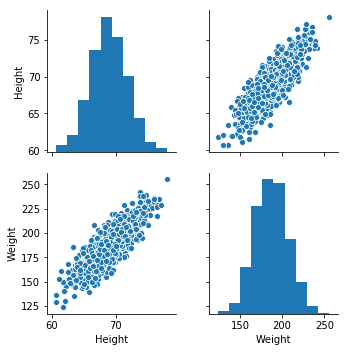

In [6]:
sns.pairplot(dataFrame)

### Split the dataset into training and testing

In [7]:
from sklearn.model_selection import train_test_split
X = np.array(dataFrame['Height']).reshape(-1, 1)
y = np.array(dataFrame['Weight']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Modeling

In [8]:
linearReg = LinearRegression().fit(X_train, y_train)

In [9]:
# Slope
print ('Slope: ', linearReg.coef_)

# y-intercept
print ('Intercept: ',linearReg.intercept_)

Slope:  [[5.86694828]]
Intercept:  [-217.71889631]


### Plotting the build model

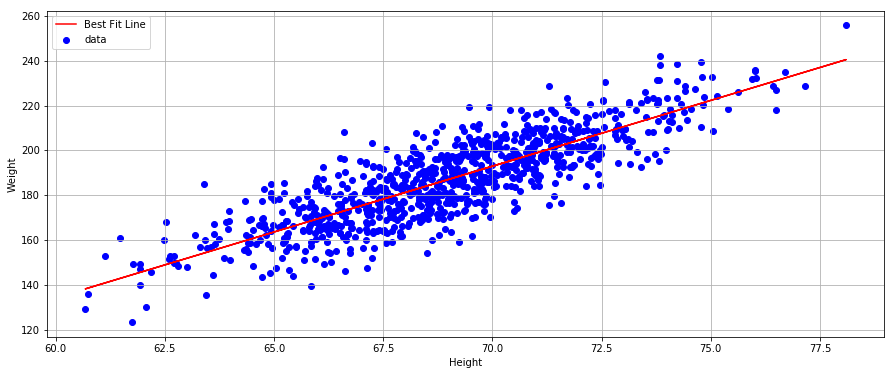

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(X_train, y_train,  color='blue', label='data')
plt.plot(X_train, linearReg.coef_[0]*X_train + linearReg.intercept_, 'r', label='Best Fit Line')
plt.legend()
plt.grid()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

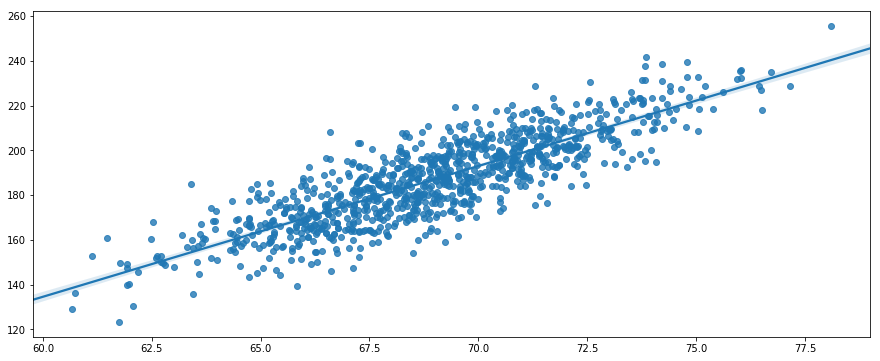

In [11]:
# Using Seaborn Library
plt.figure(figsize=(15,6))
sns.regplot(x=X, y=y.ravel())

### Making Predictions

In [12]:
y_pred = linearReg.predict(X_test)

### Evaluation

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [13]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 8.07
Residual sum of squares (MSE): 100.63
R2-score: 0.60
